<a href="https://colab.research.google.com/github/ib0607150085/Applied-Machine-Learning/blob/main/GenderWageGap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn import linear_model
import statsmodels as sm
from sklearn.model_selection import cross_val_predict


def partial_linear_regression(y, d, X, yestimator, destimator, folds = 3):

  ymethod = "predict" if False == getattr(yestimator, "Predict_proba", False) else "predict_proba"
  dmethod = "predict" if False == getattr(destimator, "Predict_proba", False) else "predict_proba"

  yhat = cross_val_predict(yestimator, X, y, cv = folds)
  dhat = cross_val_predict(destimator, X, d, cv = folds)

  ey = np.array(y - yhat)
  ed = np.array(d - dhat)
  ols = sm.regression.linear_model.OLS(ey,ed).fit(cov_type='HC0')


  return(ols, yhat, dhat)




In [6]:
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col
# Download CPS data
cpsall = pd.read_stata("https://www.nber.org/morg/annual/morg18.dta")

# take subset of data just to reduce computation time
cps_data = cpsall.sample(30000, replace=False, random_state=0)
display(cps_data.head())
cps_data.describe()

,hhid,intmonth,hurespli,hrhtype,minsamp,hrlonglk,hrsample,hrhhid2,serial,hhnum,...,ym_file,ym,ch02,ch35,ch613,ch1417,ch05,ihigrdc,docc00,dind02
103153,150909100105603,May,1.0,Civilian male primary individual,MIS 4,MIS 2-4 Or MIS 6-8 (link To,0801,08011,1,1,...,700,697,0,0,0,0,0,NaN,Business and financial operations occupations,Professional and Technical services
76648,505760912076673,March,1.0,Husband/wife primary fam (neither in Armed For...,MIS 4,MIS 2-4 Or MIS 6-8 (link To,0811,08111,1,1,...,698,695,0,0,0,0,0,12.0,NaN,NaN
51433,481462012350753,February,1.0,Husband/wife primary fam (neither in Armed For...,MIS 4,MIS 2-4 Or MIS 6-8 (link To,0701,07011,1,1,...,697,694,0,0,0,0,0,NaN,Management occupations,Agriculture
75550,106518879410166,March,2.0,Husband/wife primary fam (neither in Armed For...,MIS 8,MIS 2-4 Or MIS 6-8 (link To,0611,06111,1,1,...,698,683,0,0,0,0,0,11.0,NaN,NaN
284643,466023401171104,December,1.0,Husband/wife primary fam (neither in Armed For...,MIS 4,MIS 2-4 Or MIS 6-8 (link To,0901,09011,1,1,...,707,704,0,1,1,0,1,13.0,Management occupations,Membership associations and organizations


,hurespli,hhnum,cbsafips,county,centcity,smsastat,icntcity,smsa04,relref95,age,...,recnum,year,ym_file,ym,ch02,ch35,ch613,ch1417,ch05,ihigrdc
count,29997.000000,30000.000000,30000.000000,30000.000000,24701.000000,29689.000000,3845.000000,30000.000000,30000.000000,30000.000000,...,30000.00000,30000.0,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,21463.000000
mean,1.314898,1.052733,22812.328667,25.752033,1.926157,1.188150,1.377373,3.687667,3.200333,47.856967,...,217052.62500,2018.0,701.467433,692.357833,0.06040,0.065333,0.143033,0.086467,0.105033,12.355938
std,0.683163,0.245943,16494.302775,62.862911,0.721596,0.390839,0.946464,2.592477,3.291772,18.757968,...,125652.34375,0.0,3.467921,6.970577,0.23823,0.247117,0.350113,0.281057,0.306601,2.478719
min,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,16.000000,...,19.00000,2018.0,696.000000,681.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,32.000000,...,108185.25000,2018.0,698.000000,686.000000,0.00000,0.000000,0.000000,0.000000,0.000000,12.000000
50%,1.000000,1.000000,25420.000000,0.000000,2.000000,1.000000,1.000000,4.000000,2.000000,48.000000,...,217388.50000,2018.0,701.000000,692.000000,0.00000,0.000000,0.000000,0.000000,0.000000,12.000000
75%,1.000000,1.000000,37900.000000,29.000000,2.000000,1.000000,1.000000,6.000000,3.000000,63.000000,...,325915.00000,2018.0,704.000000,698.000000,0.00000,0.000000,0.000000,0.000000,0.000000,14.000000
max,11.000000,8.000000,49740.000000,810.000000,3.000000,2.000000,7.000000,7.000000,18.000000,85.000000,...,434279.00000,2018.0,707.000000,704.000000,1.00000,1.000000,1.000000,1.000000,1.000000,18.000000


In [7]:
cps_data["female"] = (cps_data.sex==2)
cps_data["log_earn"] = np.log(cps_data.earnwke)
cps_data["log_earn"][np.isinf(cps_data.log_earn)] = np.nan
cps_data["log_uhours"] = np.log(cps_data.uhourse)
cps_data["log_uhours"][np.isinf(cps_data.log_uhours)] = np.nan
cps_data["log_hourslw"] = np.log(cps_data.hourslw)
cps_data["log_hourslw"][np.isinf(cps_data.log_hourslw)] = np.nan
cps_data["log_wageu"] = cps_data.log_earn - cps_data.log_uhours
cps_data["log_wagelw"] = cps_data.log_earn - cps_data.log_hourslw


lm = list()
lm.append(smf.ols(formula="log_earn ~ female", data=cps_data,
                  missing="drop").fit(cov_type='HC0'))
lm.append( smf.ols(formula="log_wageu ~ female", data=cps_data,
                   missing="drop").fit(cov_type='HC0'))
lm.append(smf.ols(formula="log_wagelw ~ female", data=cps_data,
                  missing="drop").fit(cov_type='HC0'))
lm.append(smf.ols(formula="log_earn ~ female + log_hourslw + log_uhours", data=cps_data,
                  missing="drop").fit(cov_type='HC0'))

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-7-4a98d466ed47>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cps_data["log_earn"][np.isinf(cps_data.log_earn)] = np.nan
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-7-4a98d466ed47>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documen

In [8]:
summary_col(lm, stars=True)

,log_earn I,log_wageu I,log_wagelw I,log_earn II
Intercept,6.7473***,3.0970***,3.1056***,1.8014***
,(0.0088),(0.0072),(0.0078),(0.0933)
female[T.True],-0.3004***,-0.1695***,-0.1707***,-0.1258***
,(0.0127),(0.0102),(0.0112),(0.0105)
log_hourslw,,,,0.0907***
,,,,(0.0285)
log_uhours,,,,1.2631***
,,,,(0.0431)
R-squared,0.0338,0.0179,0.0149,0.4139
R-squared Adj.,0.0337,0.0179,0.0148,0.4137


In [10]:
from patsy import dmatrices
# Prepare data
fmla  = "log_earn + female ~ log_uhours + log_hourslw + age + I(age**2) + C(race) + C(cbsafips) + C(smsastat) + C(grade92) + C(unionmme) + C(unioncov) + C(ind02) + C(occ2012)"
yd, X = dmatrices(fmla,cps_data)
female = yd[:,1]
logearn = yd[:,2]

In [11]:
# select regularization parameter
alphas = np.exp(np.linspace(-2, -12, 25))
lassoy = linear_model.LassoCV(cv=6, alphas=alphas, max_iter=5000).fit(X,logearn)
lassod = linear_model.LassoCV(cv=6, alphas=alphas, max_iter=5000).fit(X,female)

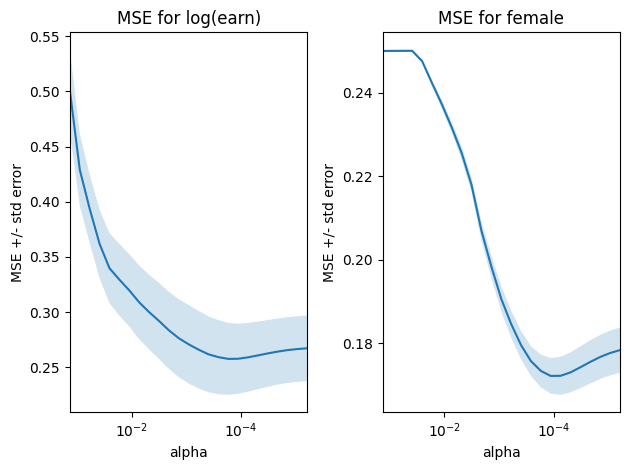

In [12]:
fig, ax = plt.subplots(1,2)

def plotlassocv(l, ax) :
    alphas = l.alphas_
    mse = l.mse_path_.mean(axis=1)
    std_error = l.mse_path_.std(axis=1)
    ax.plot(alphas,mse)
    ax.fill_between(alphas, mse + std_error, mse - std_error, alpha=0.2)

    ax.set_ylabel('MSE +/- std error')
    ax.set_xlabel('alpha')
    ax.set_xlim([alphas[0], alphas[-1]])
    ax.set_xscale("log")
    return(ax)

ax[0] = plotlassocv(lassoy,ax[0])
ax[0].set_title("MSE for log(earn)")
ax[1] = plotlassocv(lassod,ax[1])
ax[1].set_title("MSE for female")
fig.tight_layout()

# there are theoretical reasons to choose a smaller regularization
# than the one that minimizes cv. BUT THIS WAY OF CHOOSING IS ARBITRARY AND MIGHT BE WRONG
def pickalpha(lassocv) :
    imin = np.argmin(lassocv.mse_path_.mean(axis=1))
    msemin = lassocv.mse_path_.mean(axis=1)[imin]
    se = lassocv.mse_path_.std(axis=1)[imin]
    alpha= min([alpha for (alpha, mse) in zip(lassocv.alphas_, lassocv.mse_path_.mean(axis=1)) if mse<msemin+se])
    return(alpha)

alphay = pickalpha(lassoy)
alphad = pickalpha(lassod)

In [23]:
# show results
pl_lasso = partial_linear_regression(logearn, female, X,
                          linear_model.Lasso(alpha=lassoy.alpha_),
                          linear_model.Lasso(alpha=lassod.alpha_))
pl_lasso[0].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.009
Model:                            OLS   Adj. R-squared (uncentered):              0.009
Method:                 Least Squares   F-statistic:                              107.2
Date:                Sat, 22 Jun 2024   Prob (F-statistic):                    4.91e-25
Time:                        20:02:08   Log-Likelihood:                         -9718.3
No. Observations:               13052   AIC:                                  1.944e+04
Df Residuals:                   13051   BIC:                                  1.945e+04
Df Model:                           1                                                  
Covariance Type:                  HC0                                                  
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1160      0.011    -10.356      0.000      -0.138      -0.094
==============================================================================
Omnibus:                     6939.182   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           410073.398
Skew:                          -1.777   Prob(JB):                         0.00
Kurtosis:                      30.229   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors are heteroscedasticity robust (HC0)
"""

<ipython-input-24-6c1f13893358>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pl[2][female==0], hist = True, kde = False,
<ipython-input-24-6c1f13893358>:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pl[2][female==1], hist = True, kde = False,


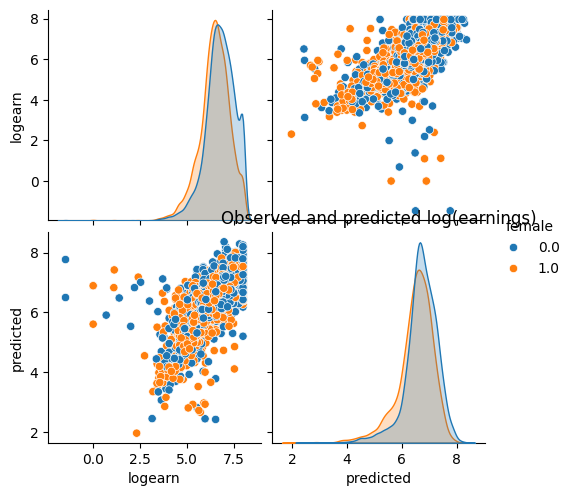

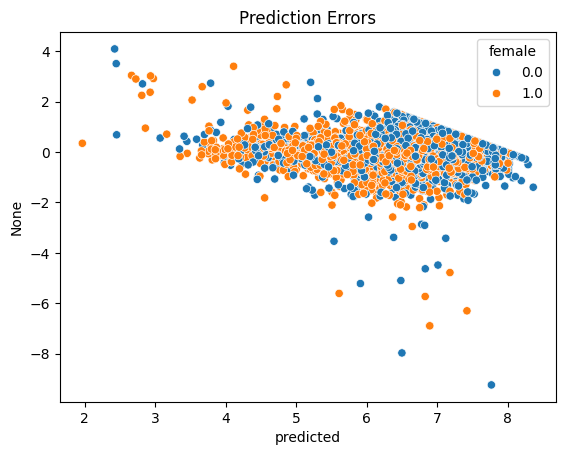

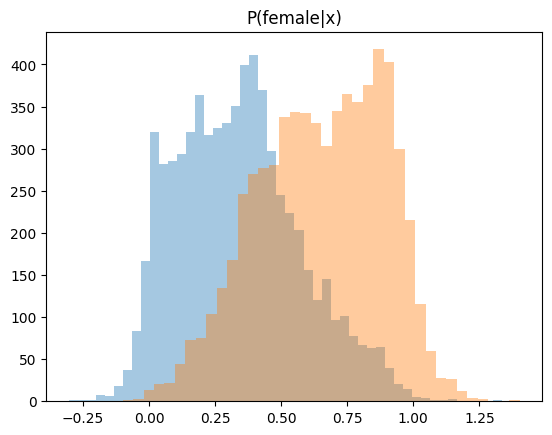

In [24]:
import seaborn as sns
# Visualize predictions
def plotpredictions(pl) :
    df = pd.DataFrame({"logearn":logearn,
                       "predicted":pl[1],
                       "female":female,
                       "P(female|x)":pl[2]})
    sns.pairplot(df, vars=["logearn","predicted"], hue="female")
    plt.title("Observed and predicted log(earnings)")

    plt.figure()
    sns.scatterplot(x = df.predicted, y = df.logearn-df.predicted, hue=df.female)
    plt.title("Prediction Errors")

    plt.figure()
    sns.distplot(pl[2][female==0], hist = True, kde = False,
                 kde_kws = {'shade': True, 'linewidth': 3},
                 label = "Male")
    sns.distplot(pl[2][female==1], hist = True, kde = False,
                 kde_kws = {'shade': True, 'linewidth': 3},
                 label = "Female")
    plt.title('P(female|x)')
plotpredictions(pl_lasso)

In [25]:
from sklearn import neural_network
from sklearn import preprocessing, pipeline, model_selection

nnp = pipeline.Pipeline(steps=[
    ("scaling", preprocessing.StandardScaler()),
    ("nn", neural_network.MLPRegressor((50,), activation="logistic",
                                       verbose=False, solver="adam",
                                       max_iter=400, early_stopping=True,
                                       validation_fraction=0.15))
])

nndcv = model_selection.GridSearchCV(estimator=nnp, scoring= 'neg_mean_squared_error', cv=4,
                                     param_grid = {'nn__alpha': np.exp(np.linspace(-5,5, 10))},
                                     return_train_score=True, verbose=True, refit=False,
                                     ).fit(X,female)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


In [26]:
nnycv = model_selection.GridSearchCV(estimator=nnp, scoring= 'neg_mean_squared_error', cv=4,
                                     param_grid = {'nn__alpha': np.exp(np.linspace(-5,5, 10))},
                                     return_train_score=True, verbose=True, refit=False,
                                     ).fit(X,logearn)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


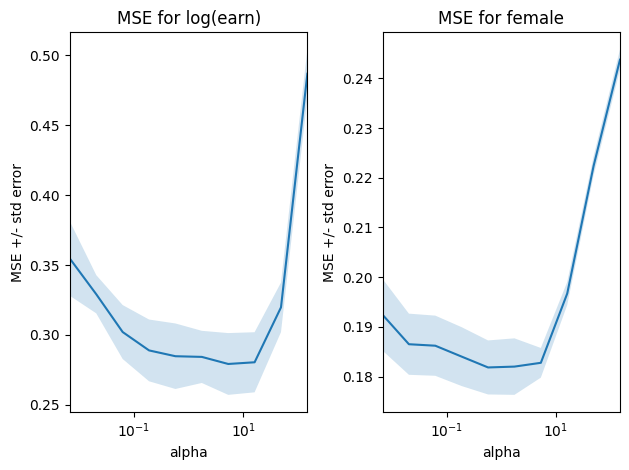

In [27]:
fig, ax = plt.subplots(1,2)

def plotgridcv(g, ax) :
    alphas = g.cv_results_["param_nn__alpha"].data.astype(float)
    mse = -g.cv_results_["mean_test_score"]
    std_error = g.cv_results_["std_test_score"]
    ax.plot(alphas,mse)
    ax.fill_between(alphas, mse+std_error, mse-std_error, alpha=0.2)

    ax.set_ylabel('MSE +/- std error')
    ax.set_xlabel('alpha')
    ax.set_xlim([alphas[0], alphas[-1]])
    ax.set_xscale("log")
    return(ax)

ax[0] = plotgridcv(nnycv,ax[0])
ax[0].set_title("MSE for log(earn)")
ax[1] = plotgridcv(nndcv,ax[1])
ax[1].set_title("MSE for female")
fig.tight_layout()

# there are theoretical reasons to choose a smaller regularization
# than the one that minimizes cv. BUT THIS WAY OF CHOOSING IS ARBITRARY AND MAYBE WRONG
def pickalphagridcv(g) :
    alphas = g.cv_results_["param_nn__alpha"].data
    mses = g.cv_results_["mean_test_score"]
    imin = np.argmin(mses)
    msemin = mses[imin]
    se = g.cv_results_["std_test_score"][imin]
    alpha= min([alpha for (alpha, mse) in zip(alphas, mses) if mse<msemin+se])
    return(alpha)

alphaynn = pickalphagridcv(nnycv)
alphadnn = pickalphagridcv(nndcv)

In [29]:
# show results
nny = nnp
nny.set_params(nn__alpha = alphaynn)
nnd = nnp
nnd.set_params(nn__alpha = alphadnn)
pl_nn = partial_linear_regression(logearn, female, X,
                       nny, nnd)
pl_nn[0].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.017
Model:                            OLS   Adj. R-squared (uncentered):              0.017
Method:                 Least Squares   F-statistic:                              220.7
Date:                Sat, 22 Jun 2024   Prob (F-statistic):                    1.65e-49
Time:                        20:21:29   Log-Likelihood:                         -13677.
No. Observations:               13052   AIC:                                  2.736e+04
Df Residuals:                   13051   BIC:                                  2.736e+04
Df Model:                           1                                                  
Covariance Type:                  HC0                                                  
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1821      0.012    -14.855      0.000      -0.206      -0.158
==============================================================================
Omnibus:                     4118.038   Durbin-Watson:                   1.718
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            46047.513
Skew:                          -1.190   Prob(JB):                         0.00
Kurtosis:                      11.888   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors are heteroscedasticity robust (HC0)
"""

<ipython-input-24-6c1f13893358>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pl[2][female==0], hist = True, kde = False,
<ipython-input-24-6c1f13893358>:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pl[2][female==1], hist = True, kde = False,


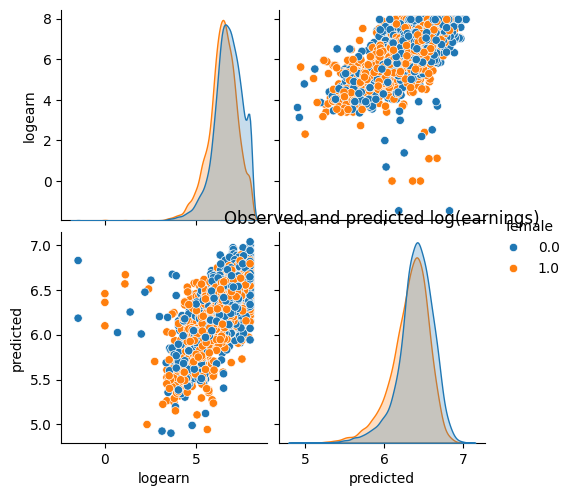

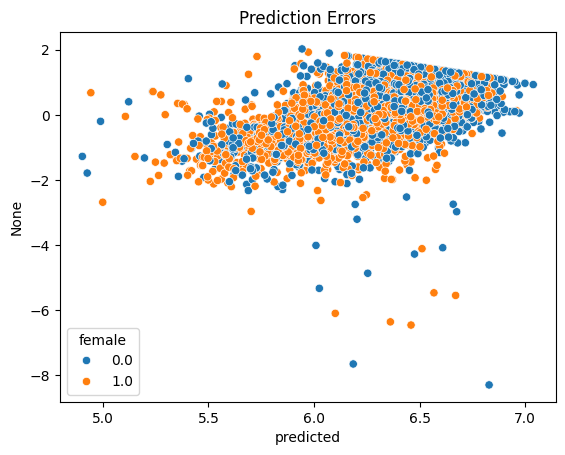

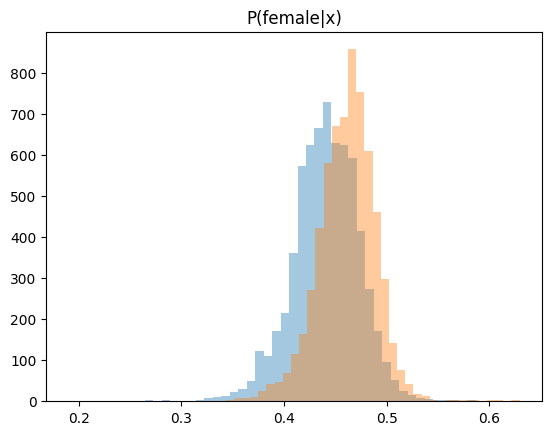

In [30]:
plotpredictions(pl_nn)


In [31]:
summary_col([pl_lasso[0], pl_nn[0]], model_names=["Lasso", "Neural Network"] ,stars=False)


,Lasso,Neural Network
x1,-0.1160,-0.1821
,(0.0112),(0.0123)
R-squared,0.0089,0.0166
R-squared Adj.,0.0088,0.0165
